## Clustering Analysis - Spectrum of Work-from-home Preferences

This program conducts a clustering analysis based on survey data. To start, please save the provided csv and this notebook in the same directory.

In [139]:
import pandas as pd
import random
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

import numpy as np

random.seed(100)

In [142]:
pip install pillow

## Load Data

In [113]:
# Import data
data_path="C:\\Users\\user\\Downloads\\HW4_SWAA_data (1).csv"
df = pd.read_csv(data_path)
df

,agebin,education,incomebin,gender,iincomebin,zipcode_job_current,zipcode_live_current,workstatus_current_new,workstatus_monday,workstatus_tuesday,...,wfh_days_postCOVID_ss,wfh_days_postCOVID_boss_ss,wfh_ownroom_notbed,wfh_feel_pr_hyb_quant0,cratio100_nw,icratio100_nw,cratio100,icratio100,numwfh_days_postCOVID_boss_s_u_l,weight
0,3.0,4.0,$20k to $50k,2.0,1.0,99505.0,99505.0,1.0,2.0,2.0,...,4.0,3.0,0.0,40.0,0.002024,0.000868,0.002084,0.000880,40.000000,0.008117
1,4.0,4.0,$100k to $150k,2.0,3.0,99613.0,99613.0,1.0,3.0,3.0,...,6.0,6.0,0.0,30.0,0.000598,0.001412,0.000616,0.001431,100.000000,0.002400
2,4.0,4.0,$100k to $150k,2.0,3.0,99613.0,99613.0,1.0,3.0,3.0,...,6.0,6.0,0.0,30.0,0.000598,0.001412,0.000616,0.001431,100.000000,0.002400
3,2.0,2.0,$20k to $50k,2.0,1.0,99687.0,99687.0,1.0,1.0,2.0,...,5.0,6.0,0.0,7.5,0.002656,0.001595,0.002735,0.001617,100.000000,0.010652
4,4.0,4.0,$150k+,2.0,4.0,99504.0,99505.0,1.0,3.0,3.0,...,1.0,1.0,100.0,7.5,0.000573,0.001720,0.000590,0.001743,0.000000,0.002297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17659,5.0,2.0,$20k to $50k,1.0,1.0,82609.0,82601.0,1.0,3.0,3.0,...,1.0,1.0,NaN,40.0,0.001405,0.000603,0.001446,0.000611,0.000000,0.005632
17660,4.0,5.0,$150k+,2.0,4.0,83001.0,83001.0,1.0,1.0,1.0,...,4.0,5.0,0.0,NaN,0.000282,0.000846,0.000290,0.000858,80.000000,0.001130
17661,2.0,4.0,$20k to $50k,1.0,1.0,83025.0,83001.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,0.001336,0.000573,0.001375,0.000581,0.000000,0.005356
17662,4.0,5.0,$100k to $150k,2.0,3.0,NaN,83001.0,2.0,1.0,1.0,...,4.0,4.0,0.0,NaN,0.000429,0.001012,0.000442,0.001026,60.000004,0.001720


## Clustering

In [114]:
# WFH-related variables (example, please refer to the variable dictionary for more)
# Please note that we have filtered the dataset to samples collected after 2021.10. 
# Therefore not all variables in the dictionary will be present in the set. 
# If you encounter ones that are in the pdf but not in the dataframe provided, simply ignore them.


# numwfh_days_postCOVID_s_u: desired share of paid working days WFH after covid
# numwfh_days_postCOVID_boss_s_u: employer planned share of paid working days WFH after covid
# worktime_curr_home_pct: percent of total working time at home
# worktime_curr_ebp_pct: employer's work site
# worktime_curr_client_pct: client work site
# worktime_curr_faf_pct: f&f's home
# worktime_curr_cowork_pct: coworking space
# worktime_curr_public_pct: public space


##### Replace with your choice of columns for clustering
selected_cols = ['numwfh_days_postCOVID_s_u','worktime_curr_home_pct',
                 'commutetime_towork', 'commutetime_fromwork',
                 'gender', 'work_industry','haschildren']
##### ========================================= #####

In [116]:
cluster_cols = df[selected_cols].dropna()

# Data normalization
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(cluster_cols.values)
normalized_df = pd.DataFrame(x_scaled, columns=cluster_cols.columns)
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}


### Determine approapriate number of clusters

In [117]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(normalized_df)
    score = silhouette_score(normalized_df, kmeans.labels_)
    silhouette_coefficients.append(score)

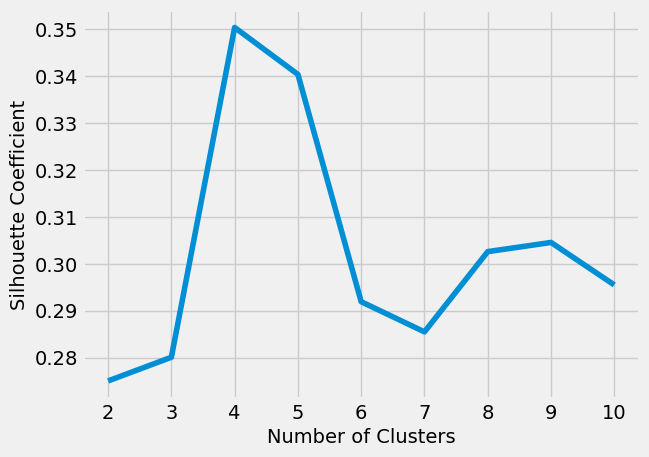

In [118]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [143]:
plt.savefig('Sihouette_score_plot.jpg')

<Figure size 640x480 with 0 Axes>

### Run K-Means

In [119]:
##### Change to your number of clusters
k = 4
#####

kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
kmeans.fit(normalized_df)
clustering_labels = kmeans.labels_

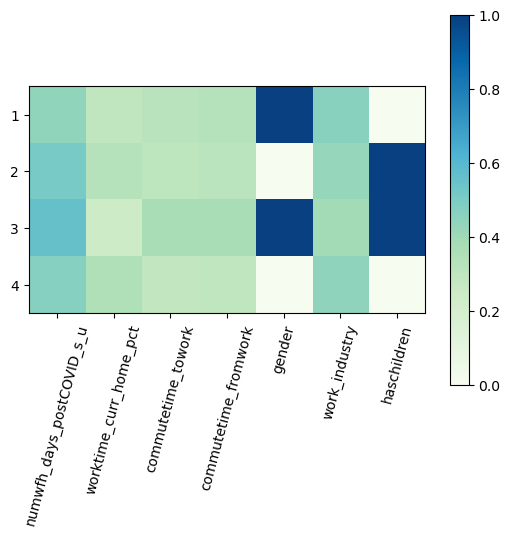

In [120]:
plt.style.use('default')
fig, ax = plt.subplots(1,1)
mappable = ax.imshow(kmeans.cluster_centers_, cmap='GnBu')
ax.set_yticks(np.arange(k))
ax.set_yticklabels(np.arange(1,k+1))
ax.set_xticks(np.arange(len(selected_cols)))
ax.set_xticklabels(selected_cols, rotation=75)
plt.colorbar(mappable, ax=ax);

## Analyze Clusters

We look at whether other demographic patterns exist in the clusters identified.

In [121]:
cluster_cols['labels'] = clustering_labels

In [122]:
normalized_df['labels'] = clustering_labels

In [126]:
##### Replace with your choice of columns for visualization
##### Not all variables have a pattern, play around with different variables to find ones that are intersting
col_plot = 'commutetime_towork'
##### ========================================= #####

In [146]:
##### Replace with your choice of columns for visualization
##### Not all variables have a pattern, play around with different variables to find ones that are intersting
col_plot_ = 'commutetime_fromwork'
##### ========================================= #####

### Continuous variables

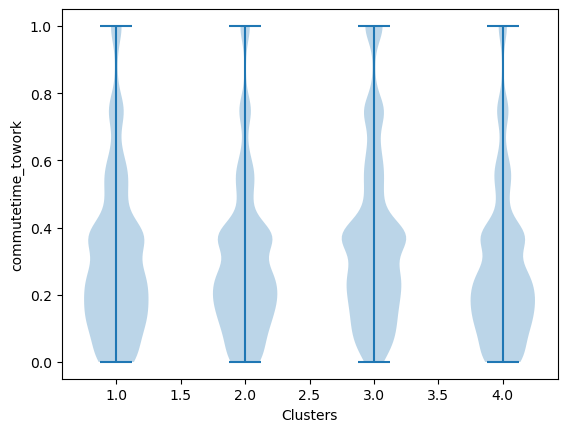

In [127]:
## Example: We see that clusters 3 and 7 tend to be younger.
## We refer back to the cluster centers to see that clusters 3 and 7 have a rather even spread between different places to work.
plt.violinplot(normalized_df.groupby('labels')[col_plot].apply(list))
plt.xlabel('Clusters')
plt.ylabel(col_plot);

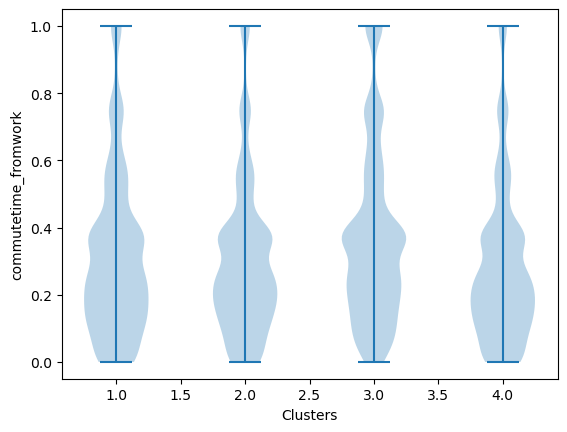

In [148]:
## Example: We see that clusters 3 and 7 tend to be younger.
## We refer back to the cluster centers to see that clusters 3 and 7 have a rather even spread between different places to work.
plt.violinplot(normalized_df.groupby('labels')[col_plot].apply(list))
plt.xlabel('Clusters')
plt.ylabel(col_plot_);

### Categorical variables

In [132]:
##### Replace with your choice of columns for visualization
##### Not all variables have a pattern, play around with different variables to find ones that are intersting
cat_col = 'haschildren'
##### ========================================= #####


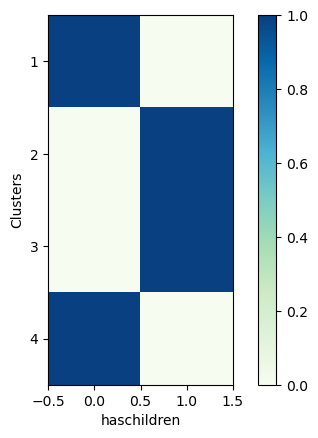

In [133]:
### Example. We see that again, clusters 3 and 7 have differnet income distributions compared to others.
### Clusters 3 and 7 represent people with higher income

# cross tabulate w.r.t. selected column
ct = pd.crosstab(normalized_df['labels'], normalized_df[cat_col])
# normalize the cross tabulation
normalize_ct = ct.T/ct.sum(axis=1).T

fig, ax = plt.subplots(1,1)
mappable = ax.imshow(normalize_ct.T, cmap='GnBu')
ax.set_yticks(np.arange(k))
ax.set_yticklabels(np.arange(1,k+1))

ax.set_xlabel(cat_col)
ax.set_ylabel("Clusters")
plt.colorbar(mappable, ax=ax);



In [134]:
##### Replace with your choice of columns for visualization
##### Not all variables have a pattern, play around with different variables to find ones that are intersting
cat_col_ = 'gender'
##### ========================================= #####

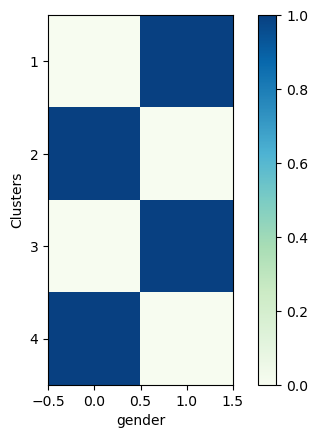

In [135]:
### Example. We see that again, clusters 3 and 7 have differnet income distributions compared to others.
### Clusters 3 and 7 represent people with higher income

# cross tabulate w.r.t. selected column
ct = pd.crosstab(normalized_df['labels'], normalized_df[cat_col_])
# normalize the cross tabulation
normalize_ct = ct.T/ct.sum(axis=1).T

fig, ax = plt.subplots(1,1)
mappable = ax.imshow(normalize_ct.T, cmap='GnBu')
ax.set_yticks(np.arange(k))
ax.set_yticklabels(np.arange(1,k+1))

ax.set_xlabel(cat_col_)
ax.set_ylabel("Clusters")
plt.colorbar(mappable, ax=ax);


In [137]:
##### Replace with your choice of columns for visualization
##### Not all variables have a pattern, play around with different variables to find ones that are intersting
cat_col__ = 'work_industry'
##### ========================================= #####

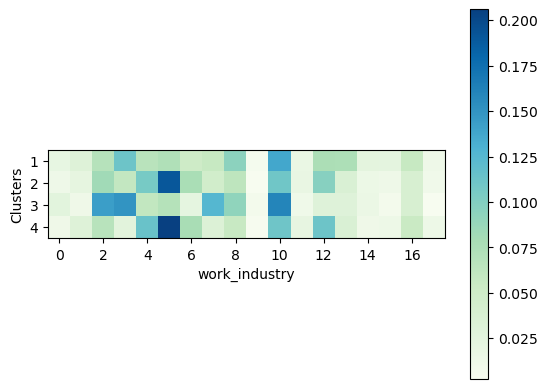

In [138]:
### Example. We see that again, clusters 3 and 7 have differnet income distributions compared to others.
### Clusters 3 and 7 represent people with higher income

# cross tabulate w.r.t. selected column
ct = pd.crosstab(normalized_df['labels'], normalized_df[cat_col__])
# normalize the cross tabulation
normalize_ct = ct.T/ct.sum(axis=1).T

fig, ax = plt.subplots(1,1)
mappable = ax.imshow(normalize_ct.T, cmap='GnBu')
ax.set_yticks(np.arange(k))
ax.set_yticklabels(np.arange(1,k+1))

ax.set_xlabel(cat_col__)
ax.set_ylabel("Clusters")
plt.colorbar(mappable, ax=ax);

Now we have completed the analysis. Please copy paste the figures to your report. 
1. Sihouette score plot
2. Cluster center visualization
3. At least 2 variables with interesting patterns (can be either continuous or categorical or both)